# Pandas 6

Pandas handles timestamps in a special way that makes it easy to work with time series. As this is particularly important for financial applications, this lecture will concentrate on time series processing.

We will look at:

* the datetime object,
* indexing and slicing by time,
* various operations on time series,
* and, time permitting, we'll build a trading simulator.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For time series analysis, we also need another module
from datetime import datetime

## Loading financial time series data

In [3]:
# Data downloaded from Yahoo! Finance
df = pd.read_csv('Pandas_6_data/aapl.csv') 

# Convert the 'Date' column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
df[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,325.64,330.26,324.84,329.57,111284600,44.59
2011-01-04,332.44,332.50,328.15,331.29,77270200,44.82
2011-01-05,329.55,334.34,329.50,334.00,63879900,45.18
2011-01-06,334.72,335.25,332.90,333.73,75107200,45.15
2011-01-07,333.99,336.35,331.90,336.12,77982800,45.47


Pandas also provides convenience functions to get data directly from web sources. For this, we need the _pandas-datareader_ module.

We need to install pandas-datareader.

* Typically, just installing it from the GUI works, but there's currently a bug whose fix is in the "dev" version, but not in the version installed by default.

* Install git  (this is a commonly used version control software). Then try
> pip install git+https://github.com/pydata/pandas-datareader.git

OR, try this:
> git clone https://github.com/pydata/pandas-datareader.git

> cd pandas-datareader

> python setup.py install

In [4]:
# Import the module for web downloads
# (You will need to install the package "pandas-datareader")
import pandas_datareader.data as web

# Specify start and end dates to download
start_date = datetime(2017, 1, 1) # January 1, 2016
end_date = datetime(2019, 1, 1)   # January 1, 2018

# Get Tesla stock for these dates
df = web.DataReader('TSLA', 'stooq', start_date, end_date)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

df[:5]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,42.972,44.066,42.192,43.398,27645515
2017-01-04,42.950,45.600,42.862,45.398,55627045
2017-01-05,45.284,45.496,44.390,45.350,29277385
2017-01-06,45.386,46.062,45.090,45.802,27321950
2017-01-09,45.794,46.384,45.600,46.256,19564525


Note that this DataFrame has a special kind of index.

In [5]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [6]:
sixth_date = df.index[5]
sixth_date

Timestamp('2017-01-10 00:00:00')

In [7]:
# We can extract year, month, etc.
print(sixth_date, 'corresponds to')
print('year', sixth_date.year)
print('month', sixth_date.month)
print('day', sixth_date.day)
print('day of the week', sixth_date.dayofweek)  # Monday=0, ..., Sunday=6
print('quarter', sixth_date.quarter)

2017-01-10 00:00:00 corresponds to
year 2017
month 1
day 10
day of the week 1
quarter 1


## Indexing in TimeSeries

We can index into this DataFrame using such Timestamp objects.

In [8]:
df.loc[sixth_date]

Open      4.640000e+01
High      4.640000e+01
Low       4.537800e+01
Close     4.597400e+01
Volume    1.798244e+07
Name: 2017-01-10 00:00:00, dtype: float64

In [9]:
df.loc['1/10/2017']  # month/day/year

Open      4.640000e+01
High      4.640000e+01
Low       4.537800e+01
Close     4.597400e+01
Volume    1.798244e+07
Name: 2017-01-10 00:00:00, dtype: float64

In [10]:
df.loc['2017-01-10'] # year-month-day

Open      4.640000e+01
High      4.640000e+01
Low       4.537800e+01
Close     4.597400e+01
Volume    1.798244e+07
Name: 2017-01-10 00:00:00, dtype: float64

In [11]:
df.loc[datetime(year=2017, month=1, day=10)]

Open      4.640000e+01
High      4.640000e+01
Low       4.537800e+01
Close     4.597400e+01
Volume    1.798244e+07
Name: 2017-01-10 00:00:00, dtype: float64

## Slicing in Time Series

We can also use any of the indexing methods above to select out slices of a time series.

In [12]:
df.loc['1/1/2017':'1/10/2017']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,42.972,44.066,42.192,43.398,27645515
2017-01-04,42.950,45.600,42.862,45.398,55627045
2017-01-05,45.284,45.496,44.390,45.350,29277385
2017-01-06,45.386,46.062,45.090,45.802,27321950
2017-01-09,45.794,46.384,45.600,46.256,19564525
2017-01-10,46.400,46.400,45.378,45.974,17982445


In addition, Pandas allows us to easily slice by month or year as well.

In [13]:
closings = df['Close']  # Select one column from our DataFrame; this is a Series
closings['2017-05']

Date
2017-05-01    64.566
2017-05-02    63.778
2017-05-03    62.204
2017-05-04    59.092
2017-05-05    61.670
2017-05-08    61.438
2017-05-09    64.252
2017-05-10    65.044
2017-05-11    64.620
2017-05-12    64.962
2017-05-15    63.176
2017-05-16    63.402
2017-05-17    61.200
2017-05-18    62.612
2017-05-19    62.166
2017-05-22    62.070
2017-05-23    60.772
2017-05-24    62.044
2017-05-25    63.366
2017-05-26    65.028
2017-05-30    67.020
2017-05-31    68.202
Name: Close, dtype: float64

In [14]:
closings['2017']

Date
2017-01-03    43.398
2017-01-04    45.398
2017-01-05    45.350
2017-01-06    45.802
2017-01-09    46.256
               ...  
2017-12-22    65.040
2017-12-26    63.458
2017-12-27    62.328
2017-12-28    63.072
2017-12-29    62.270
Name: Close, Length: 251, dtype: float64

The general solution to slicing is to create a range of dates and select a slice using that range. There are many options:

* For calendar dates, use *date_range()*, with a common case being:

   > date_range(start_date, end_date, freq)


* The "freq" can be:
    * 'D' for daily
    * 'B' for each business day
    * 'W-MON', 'W-TUE', ... for once a week on Monday, Tuesday, ...
    * 'M' for monthly
    * ...
    * 'WOM-3FRI' for third Friday of the month (usual for option expiry dates)

In [15]:
dates = pd.date_range(start='1/3/2017', end='2/3/2017', freq='W-TUE')
list(dates)

[Timestamp('2017-01-03 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-10 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-17 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-24 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-31 00:00:00', freq='W-TUE')]

In [16]:
df.loc[dates]

,Open,High,Low,Close,Volume
2017-01-03,42.972,44.066,42.192,43.398,27645515
2017-01-10,46.400,46.400,45.378,45.974,17982445
2017-01-17,47.340,47.992,46.874,47.116,22997155
2017-01-24,50.000,50.960,49.930,50.922,23902995
2017-01-31,49.848,51.178,49.540,50.386,20264285


## Shifting time series

One special operation with time series is to move backward or forward in time. For instance:

### What is the percentage daily change in closing price?

In [17]:
closes = df['Close']
closes[:10]

Date
2017-01-03    43.398
2017-01-04    45.398
2017-01-05    45.350
2017-01-06    45.802
2017-01-09    46.256
2017-01-10    45.974
2017-01-11    45.946
2017-01-12    45.918
2017-01-13    47.550
2017-01-17    47.116
Name: Close, dtype: float64

In [18]:
yesterdays_closes = closes.shift(1)
yesterdays_closes[:5]

Date
2017-01-03       NaN
2017-01-04    43.398
2017-01-05    45.398
2017-01-06    45.350
2017-01-09    45.802
Name: Close, dtype: float64

In [19]:
df['percent change'] = (closes / yesterdays_closes - 1) * 100
df['percent change'][:5]

Date
2017-01-03         NaN
2017-01-04    4.608507
2017-01-05   -0.105732
2017-01-06    0.996692
2017-01-09    0.991223
Name: percent change, dtype: float64

## Aggregate total trading volume by month

This is accomplished using the _resample()_ method. For example:

In [20]:
df['Volume'].resample('M', kind='period').sum()[:10]

Date
2017-01    489796480
2017-02    582778600
2017-03    526498485
2017-04    577682525
2017-05    737827740
2017-06    925735910
2017-07    905919195
2017-08    678431995
2017-09    556543435
2017-10    614083540
Freq: M, Name: Volume, dtype: int64

Let us understand the details of this function.

    df['volume'].resample('M', kind='period').sum()

* This takes the Volume series, which is indexed on a daily basis,
* _"resamples"_ it on a monthly basis (the 'M'),
*  using the corresponding period as the index, e.g., the month '2017-01',
* and aggregates the volumes on all days in the month using the 'sum' function.

### Find the average closing price every week

In [21]:
df['Close'].resample('W', kind='period').mean()[:10]

Date
2017-01-02/2017-01-08    44.9870
2017-01-09/2017-01-15    46.3288
2017-01-16/2017-01-22    48.1215
2017-01-23/2017-01-29    50.5388
2017-01-30/2017-02-05    50.1864
2017-02-06/2017-02-12    52.6304
2017-02-13/2017-02-19    55.3008
2017-02-20/2017-02-26    53.1945
2017-02-27/2017-03-05    49.9316
2017-03-06/2017-03-12    49.4088
Freq: W-SUN, Name: Close, dtype: float64

## Moving averages

A common statistical technique is to smooth a time series by averaging over a time window. For example, a weekly moving average of a time series has, for each day, the average value of the time series over the previous week.

### Get the 30-day moving average

In [22]:
moving_avg_30 = df['Close'].rolling(window=30, min_periods=10).mean()
moving_avg_30[5:12]

Date
2017-01-10          NaN
2017-01-11          NaN
2017-01-12          NaN
2017-01-13          NaN
2017-01-17    45.870800
2017-01-18    46.034545
2017-01-19    46.261000
Name: Close, dtype: float64

What does this mean?

    df['Close'].rolling(window=30, min_periods=10).mean()

* **df['Close']**: use this time series

* **window=30**: take a window of closes over the past 30 days

* **min_periods=10**: If the past 30 days don't exist (say, today is the 25th day from the start of the time series), what do we do? This option says:
    * for the first 10 days of the time series, the moving average doesn't exist (NaN)
    * from the 10th to 30th day, take the average of as many days as are available (so for the 25th day, we average the past 25 days)
    * from the 30th day onwards, take the average of the past 30 days

* **mean()**: Compute the mean for this rolling window

### Plot the daily closes and the 30-day moving average

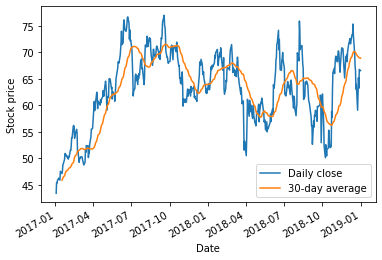

In [23]:
df['Close'].plot(label='Daily close')
df['Close'].rolling(window=30, min_periods=10).mean().plot(label='30-day average')
ylabel('Stock price')
legend(loc='best')
show()

## Trading simulator

A common trading rule says: buy when the 30-day moving average goes above the 180-day moving average (the BUY rule), and sell when it goes below (the SELL rule).

Let us assume you buy 1 share at the closing price the very day the BUY rule triggers, and sell that 1 share the day the SELL rule triggers. (This is cheating a little because we need that day's closing price to compute the averages, but let's gloss over that.) At the end, we want the overall return.

How do we do this?

* Step 1: Compute the daily return ratio, i.e., the ratio of today's closing price to yesterday's closing price.
* Step 2: Create a mask of the days when I hold the share, i.e., the BUY rule has triggered, but the SELL rule has not.
* Step 3: Compute the cumulative return ratio over the days of the mask. This is the product of the return ratios on the days I hold the share.



**Step 1: Daily returns**

We've already seen this.

In [24]:
closes = df['Close']
daily_return_ratio = closes / closes.shift(1)
daily_return_ratio[:10]

Date
2017-01-03         NaN
2017-01-04    1.046085
2017-01-05    0.998943
2017-01-06    1.009967
2017-01-09    1.009912
2017-01-10    0.993903
2017-01-11    0.999391
2017-01-12    0.999391
2017-01-13    1.035542
2017-01-17    0.990873
Name: Close, dtype: float64

**Step 2: Mask of days when we hold share**

How do we do this?

* Compute the 30-day and 180-day moving averages

* Find the days when the 30-day average is greater than the 180-day average.

* On which days do I hold the share?

 Consider the following example:

* The 30-day average is greater than the 180-day average on 5th Jan, 6th Jan, ..., 11th Jan. It falls below the 180-day average on 12th Jan.

* So we buy the share at close of 5th Jan, sell at the close of 12th Jan.

* Hence we _held_ the share (and got its returns) for 6th Jan, 7th Jan, ..., 12th Jan.

* On which days do I hold the share?
    * The days we hold the share is shifted one day from the period the 30-day moving average is higher.

**Step 2: Mask of days when we hold share**

1. Compute the 30-day and 180-day moving averages
2. Find the days when the 30-day average is greater than the 180-day average.
3. The days we hold the share is shifted one day from the periods found in Step 2.

**Step 2.1:** Moving averages

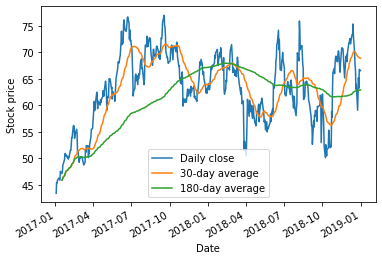

In [25]:
mavg_30 = closes.rolling(window=30, min_periods=10).mean()
mavg_180 = closes.rolling(window=180, min_periods=10).mean()

closes.plot(label='Daily close')
mavg_30.plot(label='30-day average')
mavg_180.plot(label='180-day average')
ylabel('Stock price')
legend(loc='best')
figsize(8,6)

**Step 2.2:** Find the days the 30-day average is greater.

In [26]:
mavg_30_is_greater = (mavg_30 > mavg_180)
mavg_30_is_greater['2017-02-08':'2017-02-22']

Date
2017-02-08    False
2017-02-09    False
2017-02-10    False
2017-02-13    False
2017-02-14    False
2017-02-15     True
2017-02-16     True
2017-02-17     True
2017-02-21     True
2017-02-22     True
Name: Close, dtype: bool

**Step 2.3:** Hold on the days the 30-day moving average is greater, but shifted by 1.

In [27]:
hold_days = mavg_30_is_greater.shift(1)
hold_days['2017-02-08':'2017-02-22']

Date
2017-02-08    False
2017-02-09    False
2017-02-10    False
2017-02-13    False
2017-02-14    False
2017-02-15    False
2017-02-16     True
2017-02-17     True
2017-02-21     True
2017-02-22     True
Name: Close, dtype: object

The story so far:

* We computed daily returns
* We computed the days on which we hold the share

What's left?

* Compute daily returns just on the days we hold the share
    * and take the product of these daily returns

In [28]:
# One little problem
hold_days[0:3]

Date
2017-01-03      NaN
2017-01-04    False
2017-01-05    False
Name: Close, dtype: object

The first date is NaN, because of the shift(). We cannot use hold_days as a mask for daily_return_ratio because the mask must contain only False or True. So let's fix it.

In [29]:
hold_days = hold_days.fillna(False)  # we don't hold shares on the first day
hold_days[0:3]

Date
2017-01-03    False
2017-01-04    False
2017-01-05    False
Name: Close, dtype: bool

Let's see the period when we hold the share

[Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, ''),
 Text(0, 1.5, ''),
 Text(0, 2.0, '')]

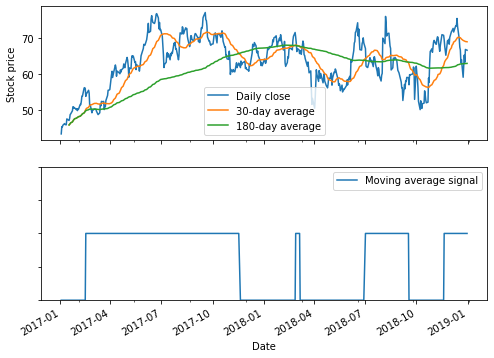

In [30]:
fig, (ax1, ax2) = subplots(nrows=2,
                           ncols=1,
                           sharex=True,
                           figsize=(8, 6))

closes.plot(ax=ax1, label='Daily close')
mavg_30.plot(ax=ax1, label='30-day average')
mavg_180.plot(ax=ax1, label='180-day average')
ax1.legend(loc='best')
ax1.set_ylabel('Stock price')

hold_days.astype(int).plot(ax=ax2, ylim=[0,2], label='Moving average signal')
ax2.legend(loc='best')
ax2.yaxis.set_ticklabels([])

**Finally: Compute cumulative return**

In [31]:
# What are the returns on the days we hold the share?
s = daily_return_ratio[hold_days]
s[:5]

Date
2017-02-16    0.961360
2017-02-17    1.012196
2017-02-21    1.018955
2017-02-22    0.986012
2017-02-23    0.935944
Name: Close, dtype: float64

In [32]:
# Overall return is the product of the returns on each day we held a share.
print('Overall return ratio =', s.prod())

Overall return ratio = 0.8371918810831809


Is this good? Let's compare to a buy-and-hold strategy, where we buy on the first day and sell on the last.

In [33]:
print('Return of buy-and-hold =', daily_return_ratio.prod())

Return of buy-and-hold = 1.5337112309323047


Let's see how the cumulative return of the moving average strategy compares to buy-and-hold.

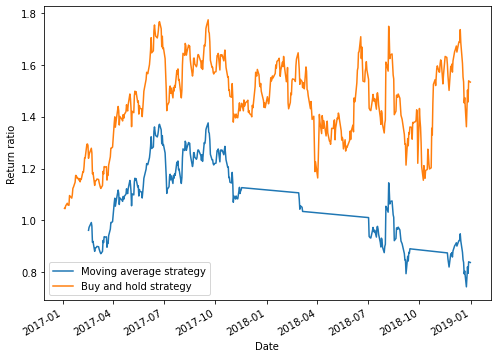

In [34]:
s.cumprod().plot(label='Moving average strategy')
daily_return_ratio.cumprod().plot(label='Buy and hold strategy')
ylabel('Return ratio')
legend(loc='best')
figsize(12,8)

* By the time the moving average strategy sells, the downturn has already hit hard.
* By the time it buys, prices have already gone up quite a bit.